In [1]:
import re
import pymongo
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
from tqdm.notebook import tqdm
from config import *
from twitter_class import (
    TwitterAuth, MaxListener, TwitterClient)
from twitter_class import (
    MaxStreamer, TwitterSearch, TweetAnalyzer)

In [2]:
client = pymongo.MongoClient(MONGO_CLIENT)
db = client.twitterdb

In [3]:
def clean_tweet(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [5]:
tweets = db.twitter_search
tweets_list = []
print('Total Record for the collection: ' + str(tweets.estimated_document_count()))
for tweet in tweets.find():
    # pprint.pprint(tweet)
    text = tweet.get("text", None)
    geography = tweet.get("geo", None)
    reply_count = tweet.get("reply_count", 0)
    retweet_count = tweet.get("retweet_count", 0)
    favorite_count = tweet.get("favorite_count", 0)
    timestamp = tweet.get("created_at", None)
    timestamp = pd.to_datetime(timestamp)
    source = tweet.get("source", None)
    
    tweets_list.append([text, geography, reply_count, retweet_count, favorite_count, timestamp, source])

Total Record for the collection: 8741


In [6]:
df = pd.DataFrame(tweets_list)
df.columns = ["text", "geography", "reply_count", "retweet_count", "favorite_count", "timestamp", "source"]
df["text"] = df["text"].map(str).apply(clean_tweet)
df.head()

,text,geography,reply_count,retweet_count,favorite_count,timestamp,source
0,RT I am in the South of France all the news ch...,None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""http://twitter.com/download/iphone"" r..."
1,RT Exclusivo Trump est estudiando sancionar a ...,None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""http://twitter.com/download/android"" ..."
2,RT From ordering in the military to bludgeonin...,None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,RT The videos again raised questions about the...,None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,RT JUST IN Secret Service walks back statement...,None,0,0,0,2020-06-14 18:40:24+00:00,"<a href=""http://twitter.com/download/iphone"" r..."


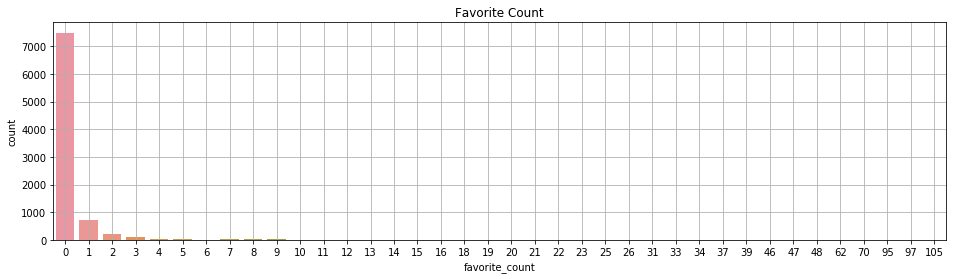

In [7]:
plt.figure(figsize=(16, 4))
sns.countplot("favorite_count", data=df)
plt.title("Favorite Count")
plt.grid()
plt.show()

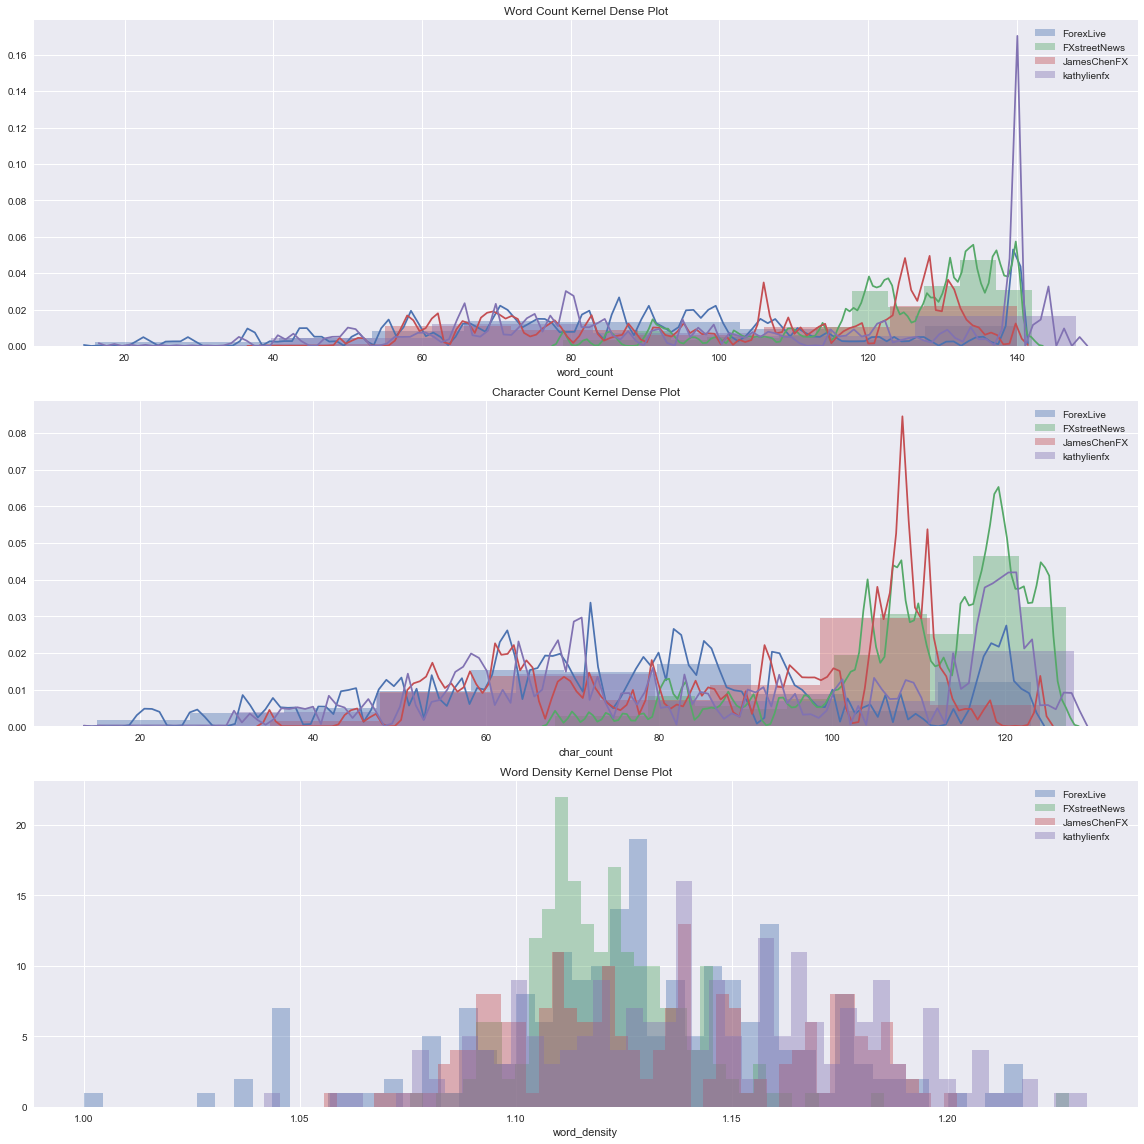

In [8]:
tweet_analyzer = TweetAnalyzer()
api = TwitterClient().get_twitter_client_api()
tweets_1 = api.user_timeline(screen_name="ForexLive", count=200)
df1 = tweet_analyzer.tweets_to_dataframe(tweets_1)
tweets_2 = api.user_timeline(screen_name="FXstreetNews", count=200)
df2 = tweet_analyzer.tweets_to_dataframe(tweets_2)
tweets_3 = api.user_timeline(screen_name="JamesChenFX", count=200)
df3 = tweet_analyzer.tweets_to_dataframe(tweets_3)
tweets_4 = api.user_timeline(screen_name="kathylienfx", count=200)
df4 = tweet_analyzer.tweets_to_dataframe(tweets_4)

# Some visualization
plt.style.use("seaborn")
plt.figure(figsize=(16, 16))
plt.subplot(3, 1, 1)
sns.distplot(df1["word_count"], label="ForexLive", kde_kws={'bw': 0.5})
sns.distplot(df2["word_count"], label="FXstreetNews", kde_kws={'bw': 0.5})
sns.distplot(df3["word_count"], label="JamesChenFX", kde_kws={'bw': 0.5})
sns.distplot(df4["word_count"], label="kathylienfx", kde_kws={'bw': 0.5})
plt.title("Word Count Kernel Dense Plot")
plt.legend()

plt.subplot(3, 1, 2)
sns.distplot(df1["char_count"], label="ForexLive", kde_kws={'bw': 0.5})
sns.distplot(df2["char_count"], label="FXstreetNews", kde_kws={'bw': 0.5})
sns.distplot(df3["char_count"], label="JamesChenFX", kde_kws={'bw': 0.5})
sns.distplot(df4["char_count"], label="kathylienfx", kde_kws={'bw': 0.5})
plt.title("Character Count Kernel Dense Plot")
plt.legend()

plt.subplot(3, 1, 3)
sns.distplot(df1["word_density"], label="ForexLive", kde=False, bins=50)
sns.distplot(df2["word_density"], label="FXstreetNews", kde=False, bins=50)
sns.distplot(df3["word_density"], label="JamesChenFX", kde=False, bins=50)
sns.distplot(df4["word_density"], label="kathylienfx", kde=False, bins=50)
plt.title("Word Density Kernel Dense Plot")
plt.legend()

plt.tight_layout()
plt.show()

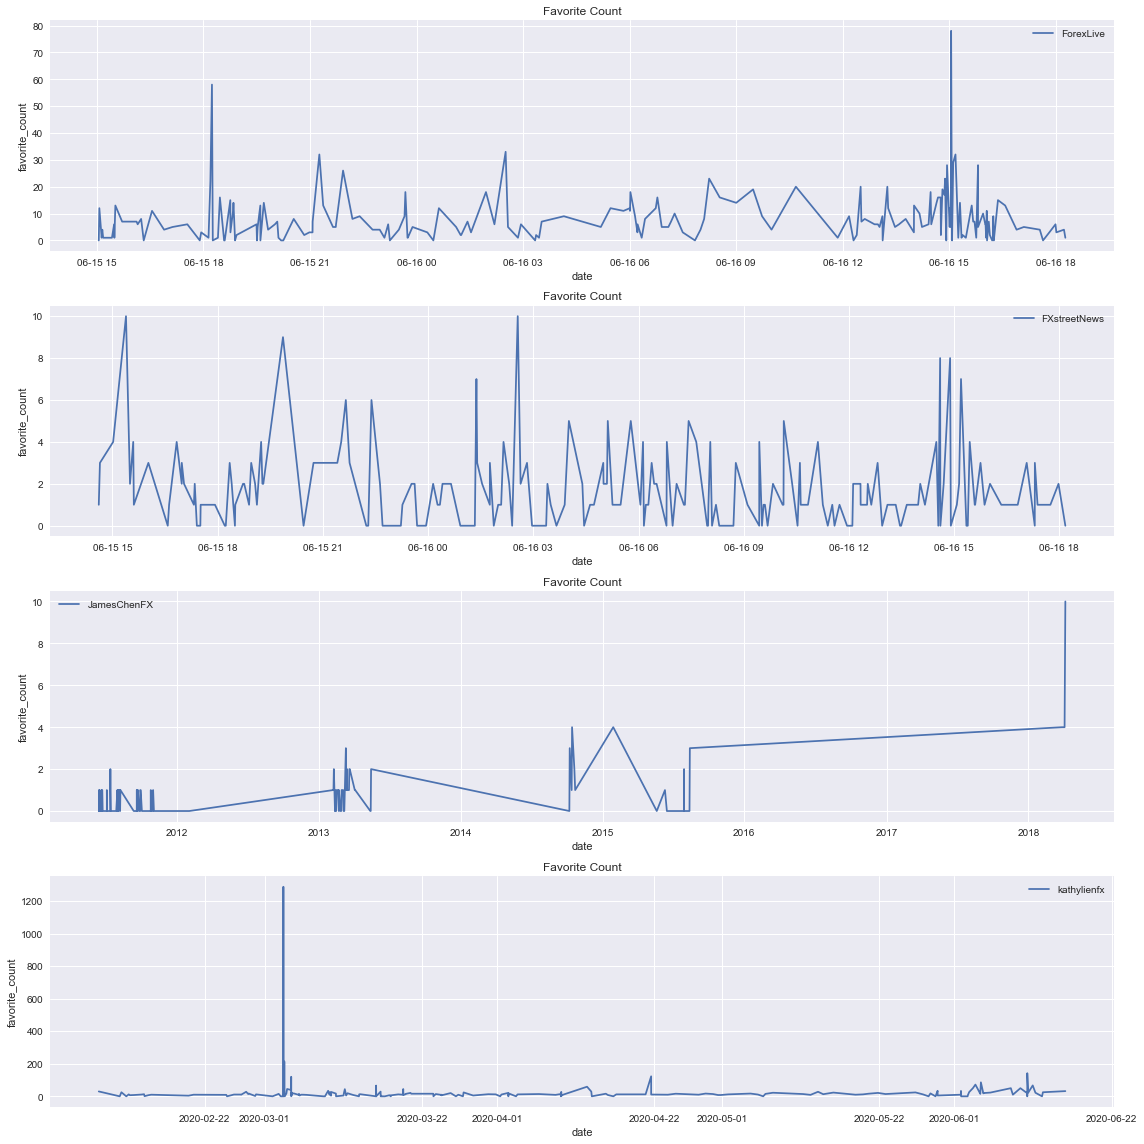

In [9]:
plt.figure(figsize=(16, 16))
plt.subplot(4, 1, 1)
sns.lineplot("date", "favorite_count", label="ForexLive", data=df1)
plt.title("Favorite Count")
plt.subplot(4, 1, 2)
sns.lineplot("date", "favorite_count", label="FXstreetNews", data=df2)
plt.title("Favorite Count")
plt.subplot(4, 1, 3)
sns.lineplot("date", "favorite_count", label="JamesChenFX", data=df3)
plt.title("Favorite Count")
plt.subplot(4, 1, 4)
sns.lineplot("date", "favorite_count", label="kathylienfx", data=df4)
plt.title("Favorite Count")
plt.tight_layout()
plt.show()